In [21]:
import sys
from tqdm import tqdm

import datasets_custom
from hzhu_MTL_UNet import *

import torch
from torch import nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader

# torch.backends.cudnn.enabled=False

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import os
import copy

In [2]:
use_augmentation = False

In [3]:
train_dataset, valid_dataset, test_dataset = datasets_custom.get_datasets(use_augmentation)
dataAll = {
            "Train": DataLoader(train_dataset, batch_size=8, shuffle=True),
            "Valid": DataLoader(valid_dataset, batch_size=8, shuffle=True),
            "Test": DataLoader(test_dataset, batch_size=1, shuffle=True) 
}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MTL_UNet(in_channels = 1, out_dict = {'class': 15, 'image': 1},)
model = model.to(device)

In [4]:
classification_loss = nn.BCELoss()
seg_pred_loss = nn.KLDivLoss()

num_epochs = 100
val_check = 5
lr = 0.0002
beta1 = 0.5
optimizer = optim.Adam(model.parameters(), lr=lr, betas=(beta1, 0.999))

In [36]:
#Function for visualization
def visualize(data, pred, disease_pred):
    fig, axs = plt.subplots(1, 3, figsize=(10,10))
    img_plot = data["cxr"].detach().cpu()
    pred_plot = pred[0].detach().cpu()
    label_plot = data["gaze"].detach().cpu()
    
    axs[0].imshow(img_plot[0, 0])
    axs[0].set_title('Image')

    axs[1].imshow(pred_plot[0],cmap='gray')
    axs[1].set_title('Prediction')

    axs[2].imshow(label_plot[-1, 0],cmap='gray')
    axs[2].set_title('Label')
        
    plt.show()
    
    np.set_printoptions(precision=3)
    true = data['Y'].detach().cpu().numpy().tolist()
    pred = disease_pred.detach().cpu().numpy().tolist()

    print(f"True v/s Pred:")
    for x, y in zip(true[0], pred[0]):
        print(f'{x}\t{round(y, 3)}')

  0%|          | 0/100 [00:00<?, ?it/s]

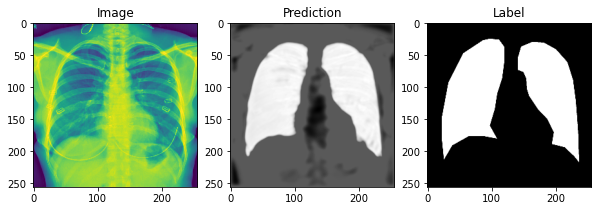

  1%|          | 1/100 [00:09<16:11,  9.81s/it]

True v/s Pred:
0	0.044
0	0.016
0	0.002
0	0.014
0	0.034
0	0.001
0	0.062
0	0.035
1	0.948
0	0.007
0	0.106
0	0.002
0	0.016
0	0.002
0	0.02
[TRAIN] Epoch : 0, Loss : -0.60066


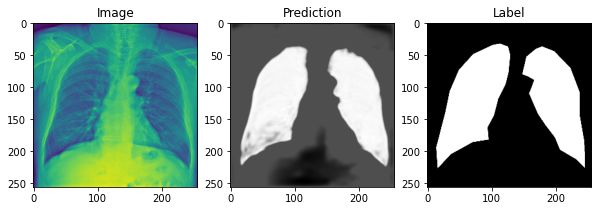

  2%|▏         | 2/100 [00:19<15:38,  9.58s/it]

True v/s Pred:
0	0.071
0	0.037
0	0.002
0	0.036
0	0.012
0	0.004
0	0.083
0	0.043
1	0.909
0	0.008
0	0.005
0	0.015
0	0.043
0	0.0
0	0.071
[TRAIN] Epoch : 1, Loss : -0.59893


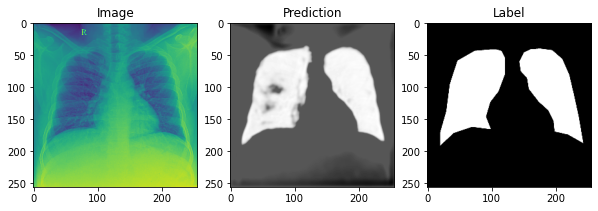

  3%|▎         | 3/100 [00:28<15:14,  9.43s/it]

True v/s Pred:
0	0.017
0	0.006
0	0.0
0	0.021
0	0.009
0	0.001
0	0.019
0	0.006
1	0.965
0	0.001
0	0.005
0	0.02
0	0.023
0	0.0
0	0.015
[TRAIN] Epoch : 2, Loss : -0.60176


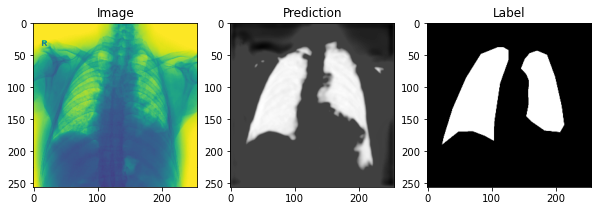

  4%|▍         | 4/100 [00:37<15:05,  9.43s/it]

True v/s Pred:
1	0.013
0	0.018
0	0.002
1	0.018
1	0.049
1	0.003
1	0.061
1	0.195
0	0.958
1	0.01
0	0.011
1	0.007
0	0.029
0	0.0
1	0.023
[TRAIN] Epoch : 3, Loss : -0.52771


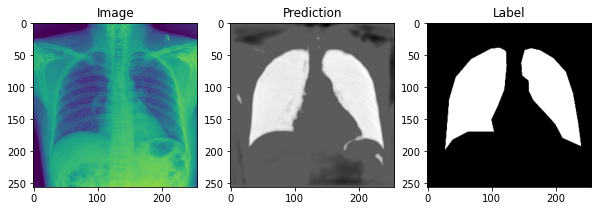

  5%|▌         | 5/100 [00:47<14:58,  9.45s/it]

True v/s Pred:
0	0.036
0	0.014
0	0.002
0	0.037
0	0.121
0	0.033
0	0.054
0	0.131
1	0.866
0	0.025
0	0.014
0	0.044
0	0.052
0	0.001
0	0.095
[TRAIN] Epoch : 4, Loss : -0.52811


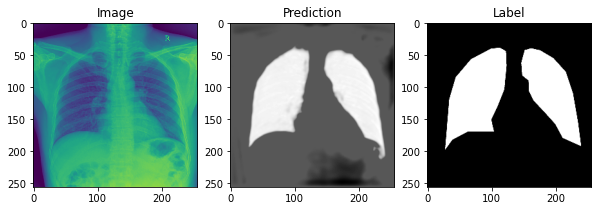

  6%|▌         | 6/100 [00:57<14:53,  9.50s/it]

True v/s Pred:
0	0.014
0	0.012
0	0.0
0	0.015
0	0.024
0	0.007
0	0.016
0	0.009
1	0.906
0	0.008
0	0.013
0	0.006
0	0.009
0	0.0
0	0.017
[TRAIN] Epoch : 5, Loss : -0.53793


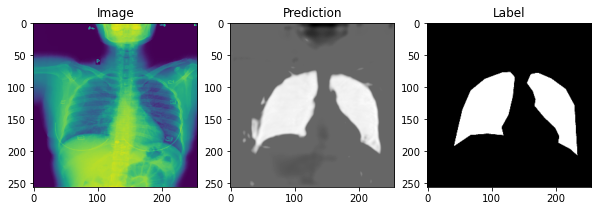

  7%|▋         | 7/100 [01:06<14:42,  9.49s/it]

True v/s Pred:
0	0.011
0	0.002
0	0.0
0	0.002
0	0.017
0	0.001
0	0.009
0	0.013
1	0.982
0	0.003
0	0.009
0	0.002
0	0.006
0	0.0
0	0.008
[TRAIN] Epoch : 6, Loss : -0.55019


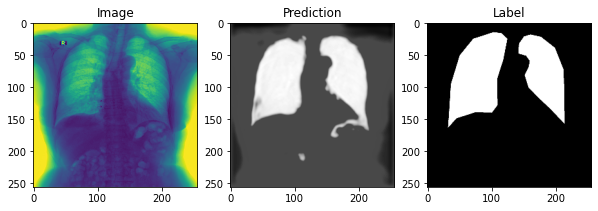

  8%|▊         | 8/100 [01:15<14:22,  9.38s/it]

True v/s Pred:
0	0.175
0	0.031
0	0.002
0	0.045
0	0.037
0	0.009
0	0.042
0	0.07
1	0.948
0	0.011
0	0.022
0	0.018
0	0.127
0	0.004
0	0.052
[TRAIN] Epoch : 7, Loss : -0.55913


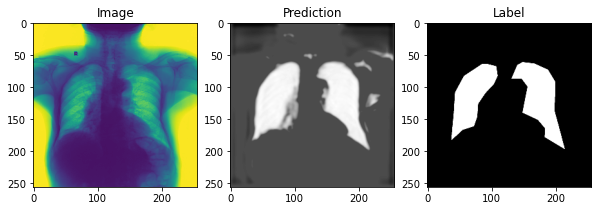

  9%|▉         | 9/100 [01:24<14:07,  9.32s/it]

True v/s Pred:
1	0.031
0	0.023
0	0.001
1	0.027
0	0.018
0	0.003
1	0.083
0	0.03
0	0.943
0	0.004
0	0.005
0	0.01
0	0.011
0	0.0
1	0.037
[TRAIN] Epoch : 8, Loss : -0.55380


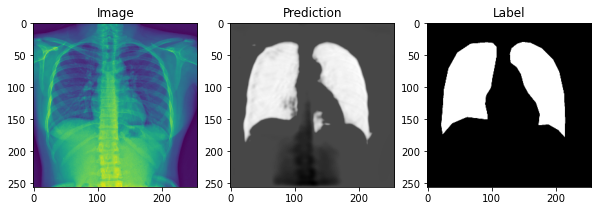

 10%|█         | 10/100 [01:33<13:52,  9.25s/it]

True v/s Pred:
0	0.002
0	0.003
0	0.002
0	0.033
0	0.189
0	0.001
0	0.038
0	0.249
1	0.941
0	0.039
0	0.042
0	0.009
0	0.054
0	0.001
0	0.054
[TRAIN] Epoch : 9, Loss : -0.56251


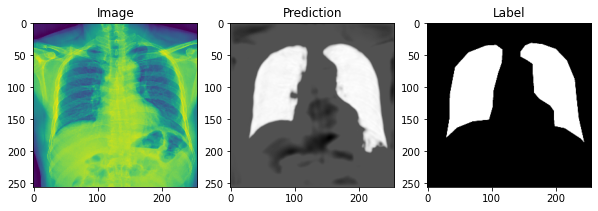

 11%|█         | 11/100 [01:42<13:28,  9.08s/it]

True v/s Pred:
0	0.151
0	0.007
0	0.0
0	0.012
0	0.01
0	0.002
0	0.002
0	0.012
1	0.981
0	0.01
0	0.011
0	0.004
0	0.004
0	0.004
0	0.068
[TRAIN] Epoch : 10, Loss : -0.57141


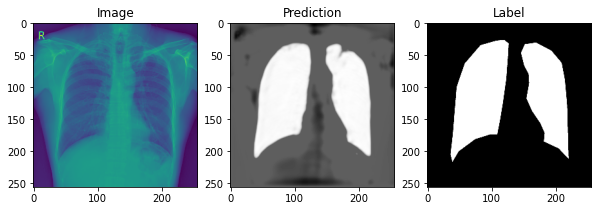

 12%|█▏        | 12/100 [01:51<13:09,  8.97s/it]

True v/s Pred:
0	0.032
0	0.007
0	0.003
0	0.022
0	0.124
0	0.01
0	0.056
0	0.311
0	0.912
0	0.006
0	0.009
0	0.017
1	0.05
0	0.001
1	0.089
[TRAIN] Epoch : 11, Loss : -0.57686


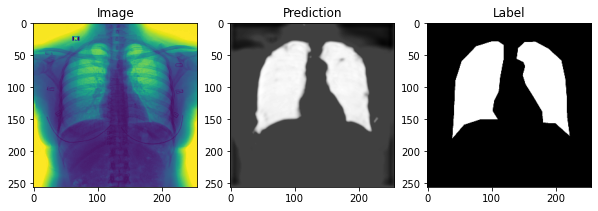

 13%|█▎        | 13/100 [02:00<13:09,  9.08s/it]

True v/s Pred:
0	0.155
0	0.023
0	0.002
0	0.028
0	0.037
0	0.007
0	0.08
0	0.049
1	0.949
0	0.011
0	0.005
0	0.029
0	0.029
0	0.005
0	0.052
[TRAIN] Epoch : 12, Loss : -0.58469


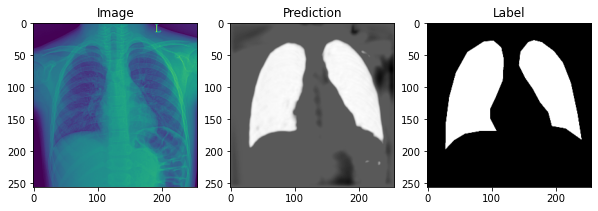

 14%|█▍        | 14/100 [02:09<12:58,  9.05s/it]

True v/s Pred:
0	0.016
0	0.001
0	0.0
0	0.01
0	0.006
0	0.003
0	0.002
0	0.011
1	0.964
0	0.001
0	0.001
0	0.007
0	0.003
0	0.0
0	0.034
[TRAIN] Epoch : 13, Loss : -0.59361


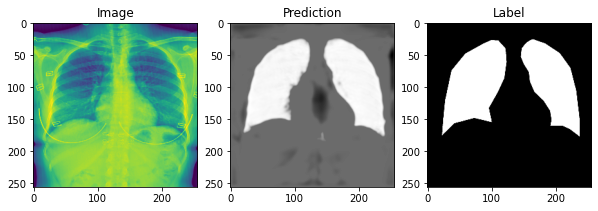

 15%|█▌        | 15/100 [02:18<12:47,  9.03s/it]

True v/s Pred:
0	0.005
0	0.001
0	0.0
0	0.012
0	0.03
0	0.0
0	0.007
0	0.034
1	0.97
0	0.006
0	0.007
0	0.001
0	0.004
0	0.0
0	0.022
[TRAIN] Epoch : 14, Loss : -0.60180


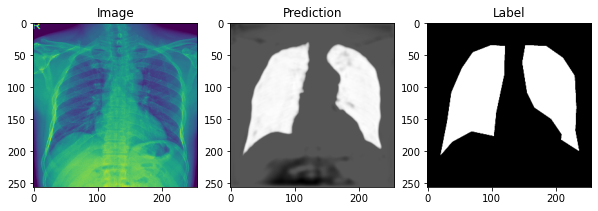

 16%|█▌        | 16/100 [02:27<12:33,  8.98s/it]

True v/s Pred:
0	0.057
0	0.005
0	0.0
0	0.006
0	0.007
0	0.002
0	0.021
0	0.004
1	0.985
0	0.004
0	0.003
0	0.004
0	0.006
0	0.001
0	0.011
[TRAIN] Epoch : 15, Loss : -0.60997


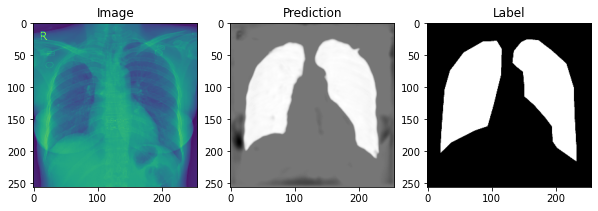

 17%|█▋        | 17/100 [02:36<12:38,  9.14s/it]

True v/s Pred:
0	0.005
1	0.004
0	0.001
1	0.064
1	0.022
0	0.002
0	0.039
0	0.049
0	0.882
1	0.001
1	0.007
0	0.041
0	0.045
0	0.001
0	0.034
[TRAIN] Epoch : 16, Loss : -0.60622


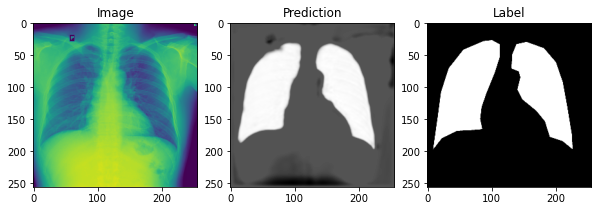

 18%|█▊        | 18/100 [02:46<12:30,  9.15s/it]

True v/s Pred:
0	0.047
0	0.005
0	0.001
0	0.055
0	0.027
0	0.011
0	0.01
0	0.055
1	0.833
0	0.008
0	0.005
0	0.025
0	0.018
0	0.001
0	0.053
[TRAIN] Epoch : 17, Loss : -0.61000


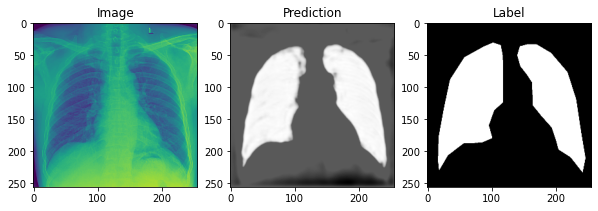

 19%|█▉        | 19/100 [02:55<12:20,  9.15s/it]

True v/s Pred:
0	0.006
0	0.002
0	0.0
0	0.005
0	0.025
0	0.002
0	0.003
0	0.011
1	0.982
0	0.02
0	0.017
0	0.001
0	0.012
0	0.0
0	0.007
[TRAIN] Epoch : 18, Loss : -0.61726


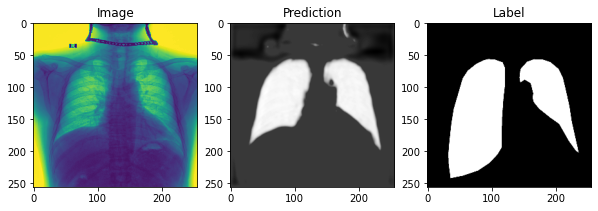

 20%|██        | 20/100 [03:04<12:13,  9.17s/it]

True v/s Pred:
0	0.005
0	0.005
0	0.0
0	0.005
0	0.021
0	0.0
0	0.005
0	0.01
1	0.992
0	0.002
0	0.009
0	0.002
0	0.008
0	0.0
0	0.01
[TRAIN] Epoch : 19, Loss : -0.62345


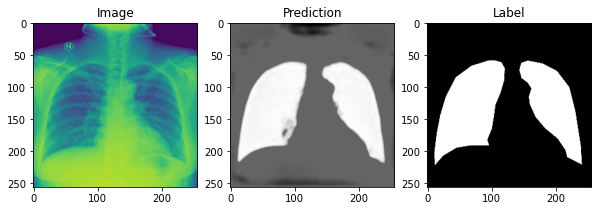

 21%|██        | 21/100 [03:13<12:07,  9.21s/it]

True v/s Pred:
0	0.011
0	0.021
0	0.003
0	0.014
0	0.05
0	0.002
0	0.055
0	0.111
1	0.956
0	0.044
0	0.046
0	0.011
0	0.009
0	0.002
0	0.045
[TRAIN] Epoch : 20, Loss : -0.63065


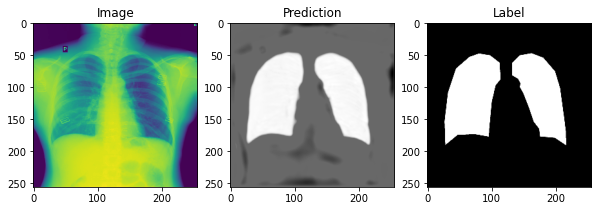

 22%|██▏       | 22/100 [03:23<11:58,  9.21s/it]

True v/s Pred:
0	0.026
0	0.039
0	0.0
0	0.01
0	0.007
0	0.002
0	0.052
0	0.003
1	0.991
0	0.005
0	0.009
0	0.001
0	0.002
0	0.0
0	0.005
[TRAIN] Epoch : 21, Loss : -0.63784


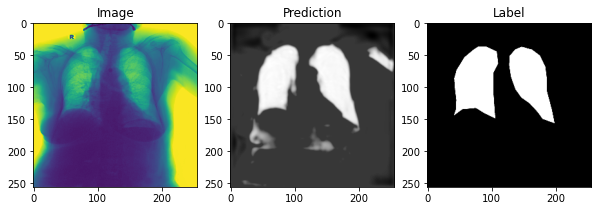

 23%|██▎       | 23/100 [03:32<11:49,  9.21s/it]

True v/s Pred:
1	0.019
0	0.007
0	0.001
1	0.01
0	0.046
0	0.001
0	0.007
0	0.041
0	0.975
0	0.023
0	0.032
0	0.002
1	0.012
0	0.001
0	0.048
[TRAIN] Epoch : 22, Loss : -0.63729


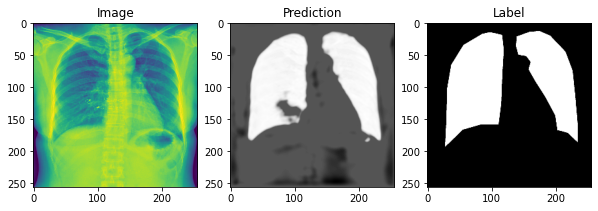

 24%|██▍       | 24/100 [03:41<11:47,  9.31s/it]

True v/s Pred:
0	0.019
0	0.004
0	0.0
0	0.005
0	0.01
0	0.001
0	0.007
0	0.005
1	0.949
0	0.007
0	0.013
0	0.001
0	0.006
0	0.0
0	0.008
[TRAIN] Epoch : 23, Loss : -0.64361


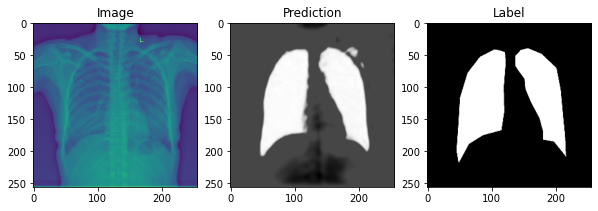

 25%|██▌       | 25/100 [03:51<11:40,  9.34s/it]

True v/s Pred:
0	0.01
0	0.004
0	0.001
0	0.014
0	0.035
0	0.001
0	0.01
0	0.035
1	0.956
0	0.005
0	0.018
0	0.002
0	0.008
0	0.001
0	0.014
[TRAIN] Epoch : 24, Loss : -0.65005


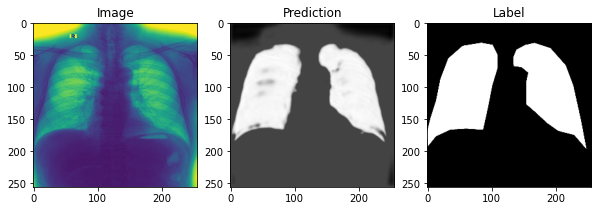

 26%|██▌       | 26/100 [04:00<11:32,  9.36s/it]

True v/s Pred:
0	0.015
0	0.004
0	0.0
0	0.038
0	0.028
0	0.001
0	0.027
0	0.016
1	0.903
0	0.005
0	0.008
0	0.015
0	0.06
0	0.001
0	0.019
[TRAIN] Epoch : 25, Loss : -0.65678


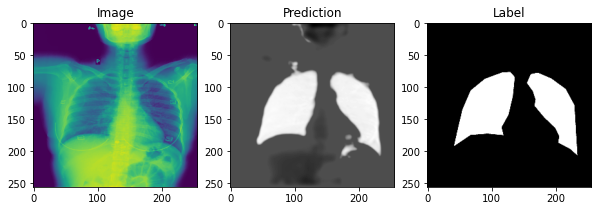

 27%|██▋       | 27/100 [04:09<11:23,  9.36s/it]

True v/s Pred:
0	0.004
0	0.002
0	0.0
0	0.002
0	0.005
0	0.0
0	0.001
0	0.001
1	0.994
0	0.0
0	0.003
0	0.001
0	0.004
0	0.0
0	0.009
[TRAIN] Epoch : 26, Loss : -0.66221


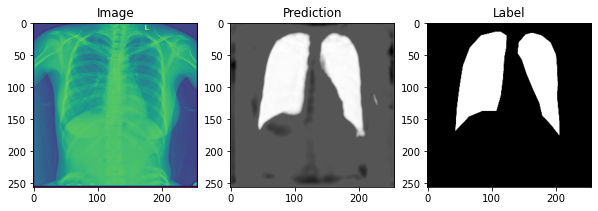

 28%|██▊       | 28/100 [04:19<11:13,  9.35s/it]

True v/s Pred:
0	0.001
0	0.005
0	0.0
0	0.004
0	0.01
0	0.001
0	0.011
0	0.006
1	0.971
0	0.005
0	0.012
0	0.003
0	0.027
0	0.0
0	0.005
[TRAIN] Epoch : 27, Loss : -0.66838


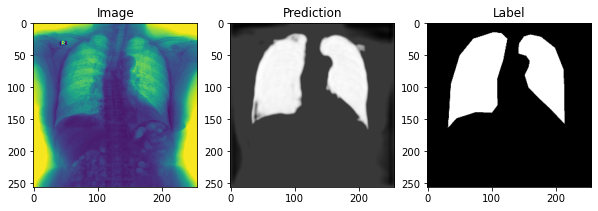

 29%|██▉       | 29/100 [04:28<11:05,  9.37s/it]

True v/s Pred:
0	0.065
0	0.024
0	0.002
0	0.069
0	0.022
0	0.002
0	0.022
0	0.073
1	0.766
0	0.007
0	0.015
0	0.007
0	0.048
0	0.004
0	0.06
[TRAIN] Epoch : 28, Loss : -0.67379


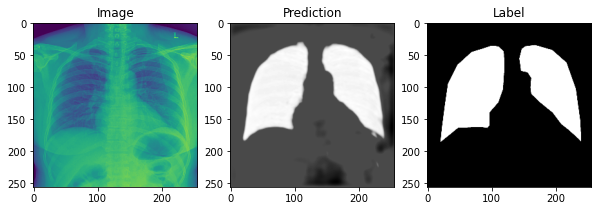

 30%|███       | 30/100 [04:38<10:56,  9.38s/it]

True v/s Pred:
0	0.001
0	0.003
0	0.0
0	0.044
0	0.01
0	0.002
0	0.011
0	0.013
1	0.971
0	0.003
0	0.008
0	0.008
0	0.027
0	0.0
0	0.005
[TRAIN] Epoch : 29, Loss : -0.68022


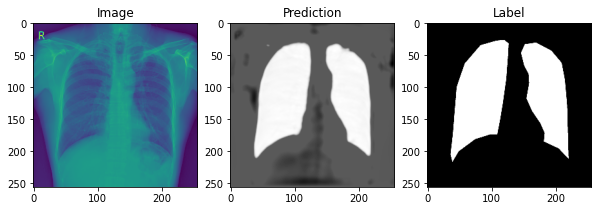

 31%|███       | 31/100 [04:47<10:47,  9.38s/it]

True v/s Pred:
0	0.011
0	0.015
0	0.001
0	0.048
0	0.019
0	0.006
0	0.034
0	0.028
0	0.894
0	0.014
0	0.047
0	0.014
1	0.096
0	0.003
1	0.017
[TRAIN] Epoch : 30, Loss : -0.68471


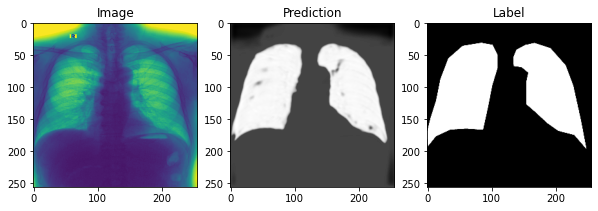

 32%|███▏      | 32/100 [04:56<10:36,  9.36s/it]

True v/s Pred:
0	0.008
0	0.008
0	0.0
0	0.021
0	0.017
0	0.002
0	0.015
0	0.005
1	0.946
0	0.001
0	0.004
0	0.008
0	0.049
0	0.0
0	0.014
[TRAIN] Epoch : 31, Loss : -0.69104


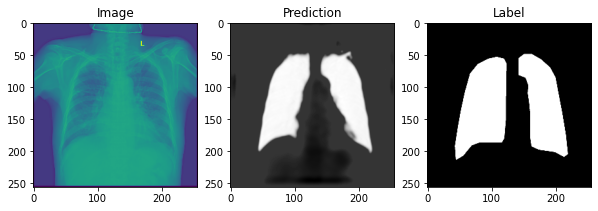

 33%|███▎      | 33/100 [05:06<10:29,  9.39s/it]

True v/s Pred:
1	0.025
0	0.039
0	0.001
1	0.035
0	0.015
0	0.005
1	0.01
1	0.047
0	0.941
1	0.004
1	0.011
0	0.017
1	0.043
0	0.004
1	0.021
[TRAIN] Epoch : 32, Loss : -0.68807


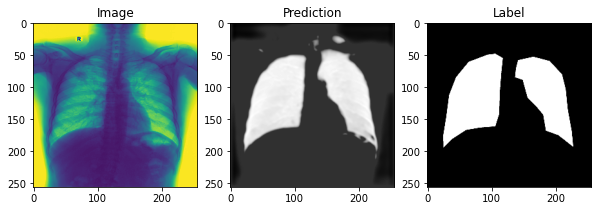

 34%|███▍      | 34/100 [05:15<10:19,  9.38s/it]

True v/s Pred:
0	0.017
0	0.007
0	0.0
0	0.029
0	0.022
0	0.001
1	0.014
1	0.01
0	0.962
0	0.011
0	0.006
0	0.002
0	0.014
0	0.0
1	0.031
[TRAIN] Epoch : 33, Loss : -0.68612


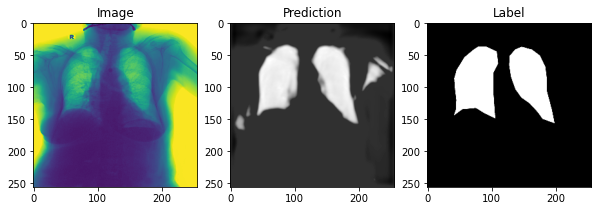

 35%|███▌      | 35/100 [05:25<10:11,  9.41s/it]

True v/s Pred:
1	0.058
0	0.041
0	0.003
1	0.063
0	0.046
0	0.011
0	0.157
0	0.122
0	0.699
0	0.005
0	0.06
0	0.014
1	0.162
0	0.002
0	0.076
[TRAIN] Epoch : 34, Loss : -0.68724


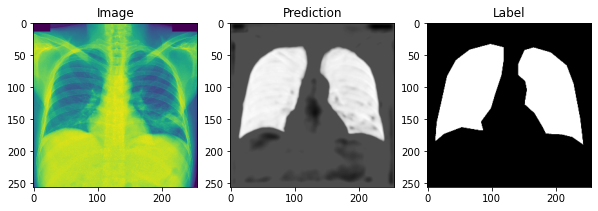

 36%|███▌      | 36/100 [05:34<10:03,  9.43s/it]

True v/s Pred:
0	0.059
0	0.017
0	0.001
0	0.009
1	0.061
0	0.002
0	0.027
1	0.121
0	0.929
0	0.014
0	0.047
0	0.023
1	0.044
0	0.012
0	0.045
[TRAIN] Epoch : 35, Loss : -0.68845


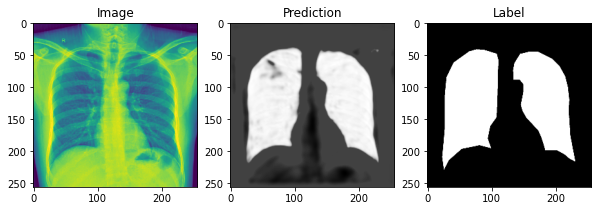

 37%|███▋      | 37/100 [05:43<09:52,  9.40s/it]

True v/s Pred:
0	0.055
0	0.011
0	0.0
0	0.093
0	0.01
0	0.012
0	0.027
0	0.018
1	0.694
0	0.024
0	0.011
0	0.006
0	0.071
0	0.0
0	0.051
[TRAIN] Epoch : 36, Loss : -0.69322


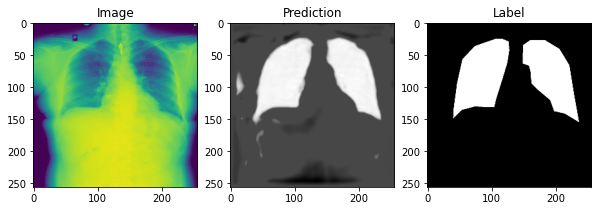

 38%|███▊      | 38/100 [05:53<09:42,  9.39s/it]

True v/s Pred:
0	0.009
0	0.004
0	0.0
0	0.024
0	0.018
0	0.002
0	0.02
0	0.032
1	0.79
0	0.012
0	0.016
0	0.005
0	0.068
0	0.0
0	0.053
[TRAIN] Epoch : 37, Loss : -0.69856


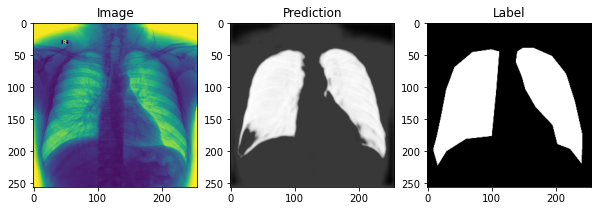

 39%|███▉      | 39/100 [06:02<09:33,  9.39s/it]

True v/s Pred:
0	0.055
0	0.02
0	0.002
0	0.029
0	0.052
0	0.007
0	0.103
0	0.022
1	0.933
0	0.028
0	0.015
0	0.019
0	0.044
0	0.002
0	0.121
[TRAIN] Epoch : 38, Loss : -0.70462


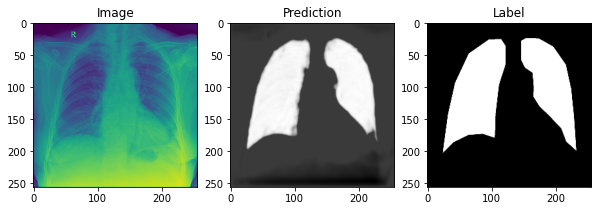

 40%|████      | 40/100 [06:12<09:23,  9.39s/it]

True v/s Pred:
0	0.003
0	0.006
0	0.001
0	0.065
0	0.019
0	0.002
0	0.02
0	0.021
1	0.94
0	0.014
0	0.019
0	0.003
0	0.048
0	0.0
0	0.012
[TRAIN] Epoch : 39, Loss : -0.71055


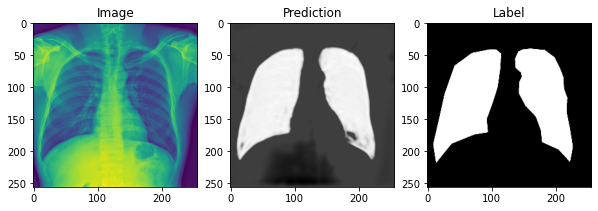

 41%|████      | 41/100 [06:21<09:14,  9.40s/it]

True v/s Pred:
0	0.003
0	0.001
0	0.0
0	0.011
0	0.01
0	0.001
0	0.014
0	0.013
1	0.94
0	0.002
0	0.0
0	0.001
0	0.021
0	0.0
0	0.022
[TRAIN] Epoch : 40, Loss : -0.71691


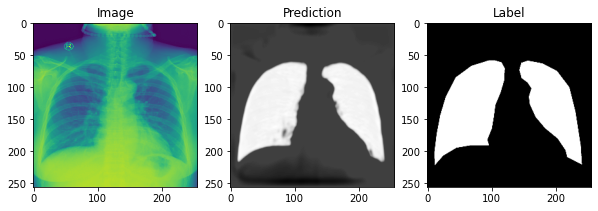

 42%|████▏     | 42/100 [06:31<09:08,  9.46s/it]

True v/s Pred:
0	0.01
0	0.005
0	0.0
0	0.01
0	0.01
0	0.002
0	0.013
0	0.004
1	0.957
0	0.002
0	0.003
0	0.001
0	0.011
0	0.0
0	0.006
[TRAIN] Epoch : 41, Loss : -0.72325


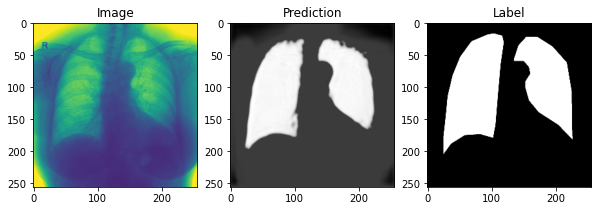

 43%|████▎     | 43/100 [06:40<08:58,  9.44s/it]

True v/s Pred:
1	0.055
0	0.013
0	0.002
1	0.083
0	0.083
0	0.019
0	0.026
0	0.072
0	0.818
0	0.019
0	0.021
0	0.017
0	0.145
0	0.004
0	0.064
[TRAIN] Epoch : 42, Loss : -0.72804


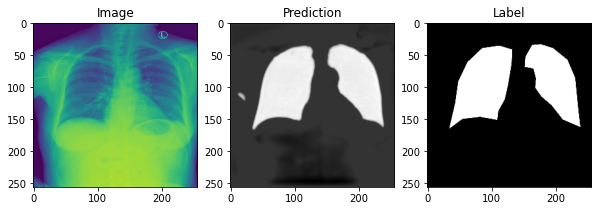

 44%|████▍     | 44/100 [06:49<08:46,  9.41s/it]

True v/s Pred:
0	0.243
0	0.007
0	0.0
0	0.016
0	0.009
0	0.004
0	0.012
0	0.011
1	0.941
0	0.002
0	0.01
0	0.003
0	0.015
0	0.001
0	0.022
[TRAIN] Epoch : 43, Loss : -0.73372


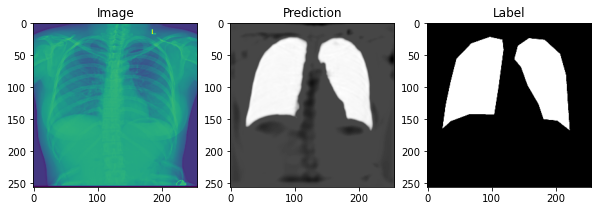

 45%|████▌     | 45/100 [06:59<08:38,  9.43s/it]

True v/s Pred:
0	0.021
0	0.002
0	0.0
0	0.002
0	0.017
0	0.0
0	0.009
0	0.008
1	0.991
0	0.003
0	0.003
0	0.001
0	0.011
0	0.0
0	0.011
[TRAIN] Epoch : 44, Loss : -0.73955


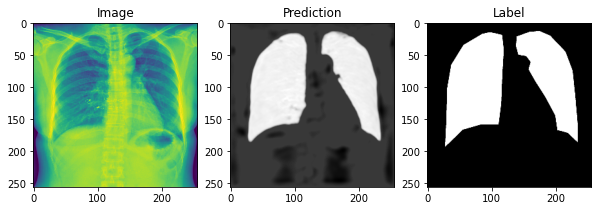

 46%|████▌     | 46/100 [07:08<08:26,  9.38s/it]

True v/s Pred:
0	0.021
0	0.004
0	0.001
0	0.048
0	0.022
0	0.001
0	0.023
0	0.026
1	0.85
0	0.023
0	0.024
0	0.002
0	0.011
0	0.001
0	0.091
[TRAIN] Epoch : 45, Loss : -0.74575


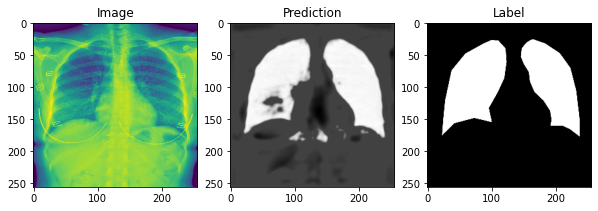

 47%|████▋     | 47/100 [07:17<08:16,  9.36s/it]

True v/s Pred:
0	0.002
0	0.0
0	0.0
0	0.005
0	0.021
0	0.001
0	0.003
0	0.03
1	0.982
0	0.008
0	0.003
0	0.0
0	0.007
0	0.0
0	0.027
[TRAIN] Epoch : 46, Loss : -0.75155


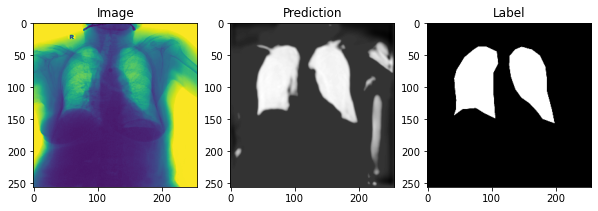

 48%|████▊     | 48/100 [07:27<08:08,  9.39s/it]

True v/s Pred:
1	0.037
0	0.003
0	0.0
1	0.037
0	0.057
0	0.003
0	0.02
0	0.069
0	0.765
0	0.004
0	0.018
0	0.002
1	0.012
0	0.0
0	0.106
[TRAIN] Epoch : 47, Loss : -0.75437


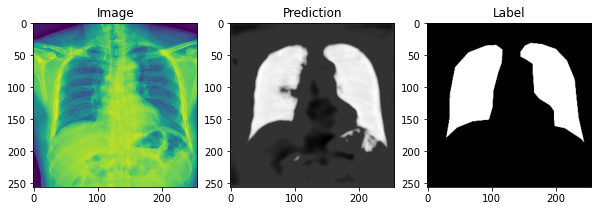

 49%|████▉     | 49/100 [07:36<07:59,  9.40s/it]

True v/s Pred:
0	0.099
0	0.017
0	0.003
0	0.031
0	0.005
0	0.004
0	0.019
0	0.006
1	0.96
0	0.212
0	0.01
0	0.006
0	0.008
0	0.0
0	0.063
[TRAIN] Epoch : 48, Loss : -0.75884


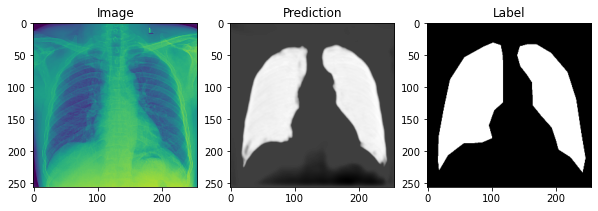

 50%|█████     | 50/100 [07:46<07:50,  9.40s/it]

True v/s Pred:
0	0.035
0	0.045
0	0.0
0	0.016
0	0.021
0	0.005
0	0.012
0	0.042
1	0.989
0	0.003
0	0.006
0	0.009
0	0.151
0	0.001
0	0.041
[TRAIN] Epoch : 49, Loss : -0.76458


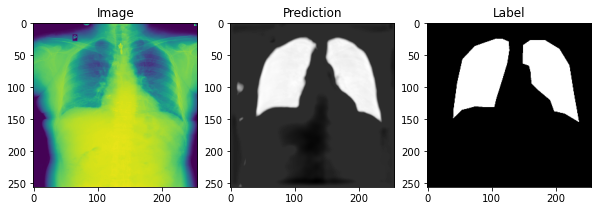

 51%|█████     | 51/100 [07:55<07:41,  9.43s/it]

True v/s Pred:
0	0.007
0	0.006
0	0.0
0	0.009
0	0.006
0	0.0
0	0.024
0	0.012
1	0.982
0	0.002
0	0.002
0	0.002
0	0.011
0	0.0
0	0.018
[TRAIN] Epoch : 50, Loss : -0.77011


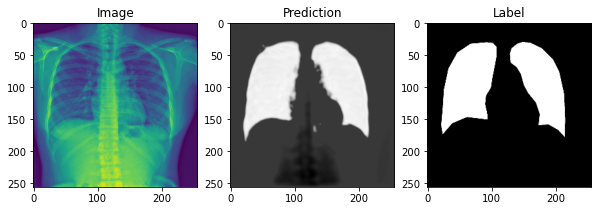

 52%|█████▏    | 52/100 [08:05<07:33,  9.45s/it]

True v/s Pred:
0	0.003
0	0.002
0	0.0
0	0.01
0	0.097
0	0.001
0	0.036
0	0.072
1	0.951
0	0.0
0	0.001
0	0.009
0	0.144
0	0.0
0	0.017
[TRAIN] Epoch : 51, Loss : -0.77575


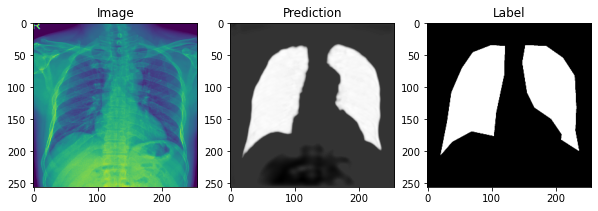

 53%|█████▎    | 53/100 [08:14<07:25,  9.48s/it]

True v/s Pred:
0	0.014
0	0.08
0	0.0
0	0.005
0	0.004
0	0.008
0	0.019
0	0.007
1	0.992
0	0.017
0	0.013
0	0.002
0	0.027
0	0.0
0	0.002
[TRAIN] Epoch : 52, Loss : -0.78149


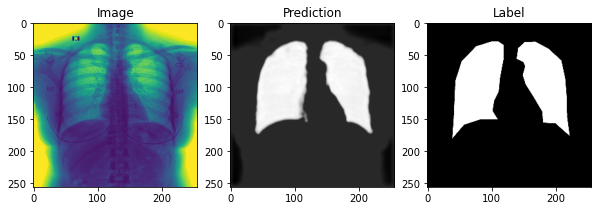

 54%|█████▍    | 54/100 [08:24<07:15,  9.46s/it]

True v/s Pred:
0	0.004
0	0.005
0	0.0
0	0.008
0	0.002
0	0.001
0	0.013
0	0.002
1	0.975
0	0.002
0	0.005
0	0.0
0	0.005
0	0.0
0	0.004
[TRAIN] Epoch : 53, Loss : -0.78710


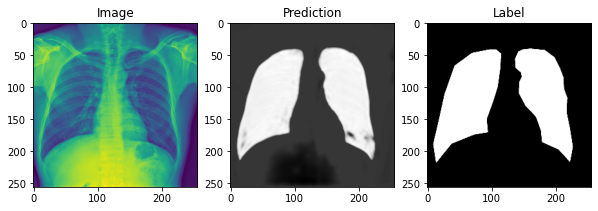

 55%|█████▌    | 55/100 [08:33<07:05,  9.46s/it]

True v/s Pred:
0	0.002
0	0.001
0	0.0
0	0.004
0	0.008
0	0.0
0	0.005
0	0.001
1	0.992
0	0.004
0	0.003
0	0.001
0	0.006
0	0.0
0	0.004
[TRAIN] Epoch : 54, Loss : -0.79294


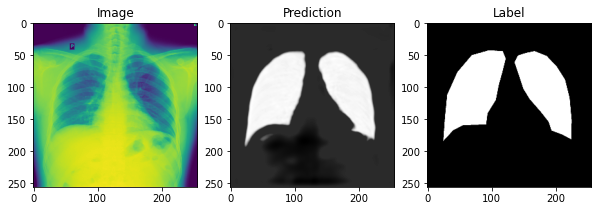

 56%|█████▌    | 56/100 [08:42<06:55,  9.43s/it]

True v/s Pred:
0	0.002
0	0.0
0	0.0
0	0.054
0	0.005
0	0.0
0	0.004
0	0.006
1	0.974
0	0.0
0	0.0
0	0.0
0	0.002
0	0.0
0	0.006
[TRAIN] Epoch : 55, Loss : -0.79861


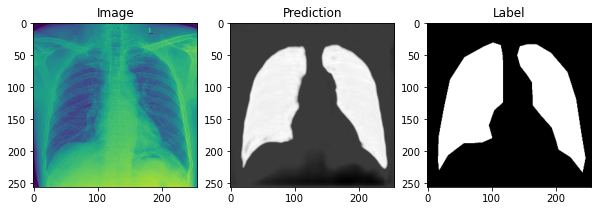

 57%|█████▋    | 57/100 [08:52<06:44,  9.40s/it]

True v/s Pred:
0	0.002
0	0.008
0	0.0
0	0.026
0	0.004
0	0.001
0	0.003
0	0.015
1	0.958
0	0.003
0	0.008
0	0.002
0	0.197
0	0.001
0	0.005
[TRAIN] Epoch : 56, Loss : -0.80443


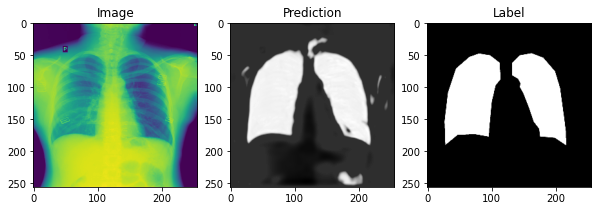

 58%|█████▊    | 58/100 [09:01<06:34,  9.39s/it]

True v/s Pred:
0	0.015
0	0.008
0	0.0
0	0.004
0	0.01
0	0.004
0	0.01
0	0.01
1	0.99
0	0.002
0	0.001
0	0.003
0	0.001
0	0.0
0	0.007
[TRAIN] Epoch : 57, Loss : -0.80963


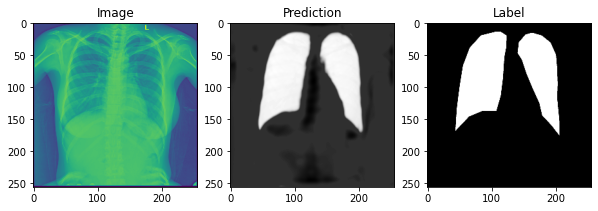

 59%|█████▉    | 59/100 [09:11<06:25,  9.40s/it]

True v/s Pred:
0	0.01
0	0.005
0	0.0
0	0.01
0	0.018
0	0.001
0	0.049
0	0.004
1	0.994
0	0.02
0	0.004
0	0.012
0	0.01
0	0.001
0	0.043
[TRAIN] Epoch : 58, Loss : -0.81472


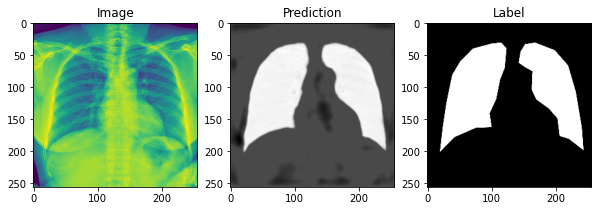

 60%|██████    | 60/100 [09:20<06:20,  9.51s/it]

True v/s Pred:
0	0.018
0	0.0
0	0.0
0	0.001
0	0.005
0	0.0
0	0.004
0	0.001
1	0.991
0	0.001
0	0.007
0	0.0
0	0.003
0	0.0
0	0.003
[TRAIN] Epoch : 59, Loss : -0.82032


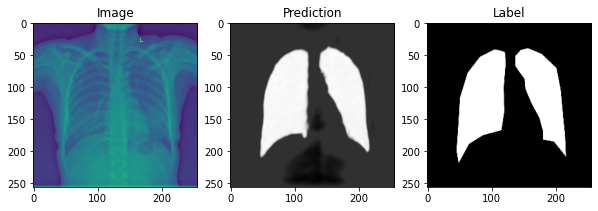

 61%|██████    | 61/100 [09:30<06:10,  9.50s/it]

True v/s Pred:
0	0.004
0	0.009
0	0.0
0	0.003
0	0.002
0	0.0
0	0.008
0	0.002
1	0.997
0	0.002
0	0.007
0	0.001
0	0.024
0	0.0
0	0.002
[TRAIN] Epoch : 60, Loss : -0.82596


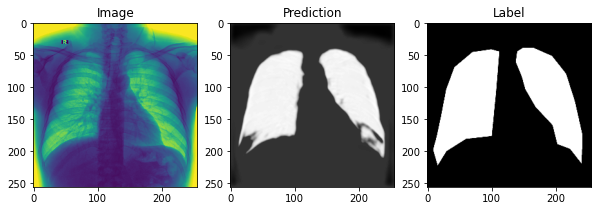

 62%|██████▏   | 62/100 [09:39<05:58,  9.43s/it]

True v/s Pred:
0	0.015
0	0.012
0	0.0
0	0.025
0	0.006
0	0.0
0	0.016
0	0.005
1	0.955
0	0.007
0	0.011
0	0.002
0	0.071
0	0.0
0	0.011
[TRAIN] Epoch : 61, Loss : -0.83151


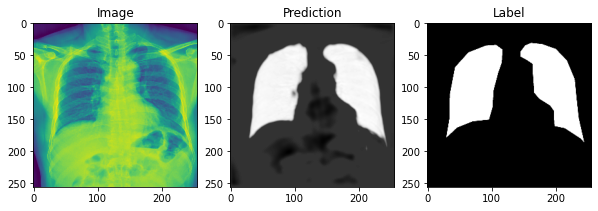

 63%|██████▎   | 63/100 [09:48<05:47,  9.40s/it]

True v/s Pred:
0	0.039
0	0.016
0	0.0
0	0.019
0	0.002
0	0.0
0	0.024
0	0.003
1	0.979
0	0.005
0	0.011
0	0.0
0	0.006
0	0.0
0	0.03
[TRAIN] Epoch : 62, Loss : -0.83682


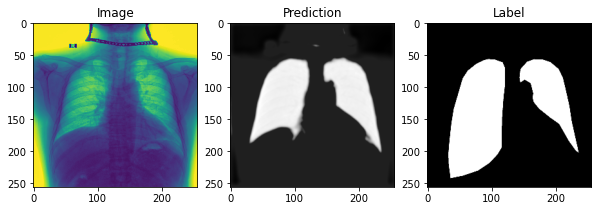

 64%|██████▍   | 64/100 [09:58<05:41,  9.49s/it]

True v/s Pred:
0	0.021
0	0.006
0	0.0
0	0.017
0	0.026
0	0.001
0	0.014
0	0.018
1	0.929
0	0.015
0	0.049
0	0.011
0	0.039
0	0.016
0	0.045
[TRAIN] Epoch : 63, Loss : -0.84216


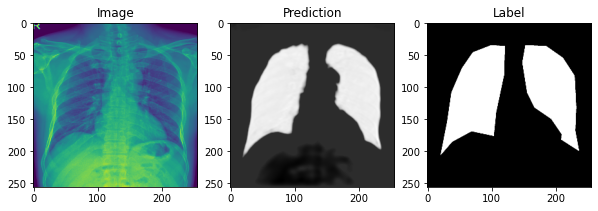

 65%|██████▌   | 65/100 [10:07<05:30,  9.46s/it]

True v/s Pred:
0	0.003
0	0.001
0	0.0
0	0.003
0	0.001
0	0.0
0	0.001
0	0.001
1	0.999
0	0.0
0	0.0
0	0.0
0	0.007
0	0.0
0	0.0
[TRAIN] Epoch : 64, Loss : -0.84788


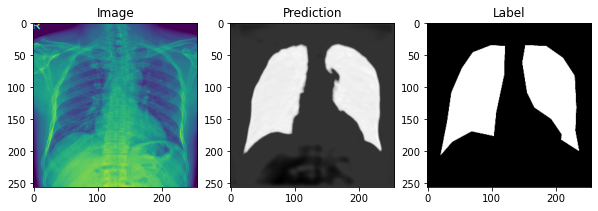

 66%|██████▌   | 66/100 [10:17<05:22,  9.48s/it]

True v/s Pred:
0	0.01
0	0.002
0	0.0
0	0.001
0	0.0
0	0.0
0	0.001
0	0.0
1	0.996
0	0.0
0	0.001
0	0.0
0	0.0
0	0.0
0	0.001
[TRAIN] Epoch : 65, Loss : -0.85357


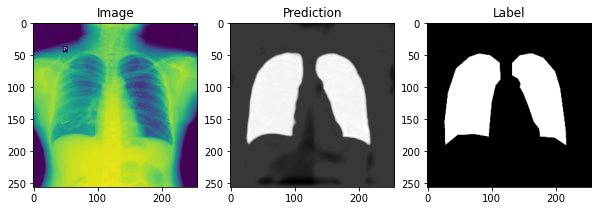

 67%|██████▋   | 67/100 [10:26<05:08,  9.36s/it]

True v/s Pred:
0	0.011
0	0.001
0	0.0
0	0.011
0	0.011
0	0.0
0	0.002
0	0.001
1	0.988
0	0.005
0	0.001
0	0.0
0	0.001
0	0.0
0	0.005
[TRAIN] Epoch : 66, Loss : -0.85903


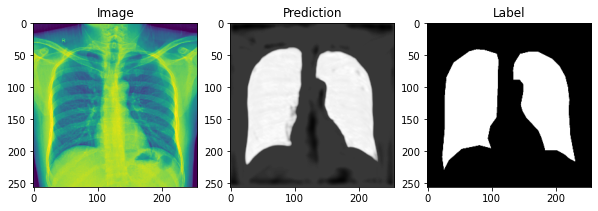

 68%|██████▊   | 68/100 [10:35<04:57,  9.28s/it]

True v/s Pred:
0	0.003
0	0.0
0	0.0
0	0.001
0	0.005
0	0.0
0	0.004
0	0.0
1	0.997
0	0.0
0	0.0
0	0.0
0	0.0
0	0.0
0	0.005
[TRAIN] Epoch : 67, Loss : -0.86484


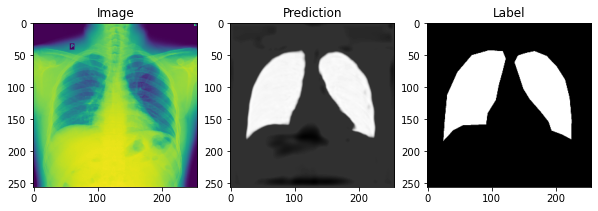

 69%|██████▉   | 69/100 [10:45<04:48,  9.31s/it]

True v/s Pred:
0	0.021
0	0.012
0	0.0
0	0.013
0	0.001
0	0.0
0	0.004
0	0.0
1	0.997
0	0.002
0	0.008
0	0.0
0	0.012
0	0.0
0	0.007
[TRAIN] Epoch : 68, Loss : -0.87036


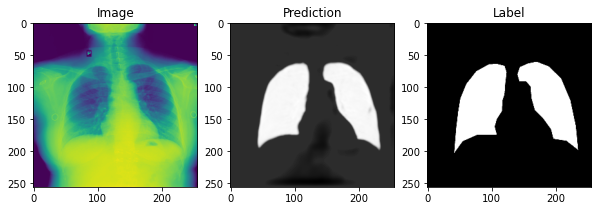

 70%|███████   | 70/100 [10:54<04:39,  9.32s/it]

True v/s Pred:
0	0.004
0	0.001
0	0.0
0	0.004
0	0.003
0	0.0
0	0.002
0	0.002
1	0.995
0	0.001
0	0.0
0	0.002
0	0.005
0	0.0
0	0.004
[TRAIN] Epoch : 69, Loss : -0.87566


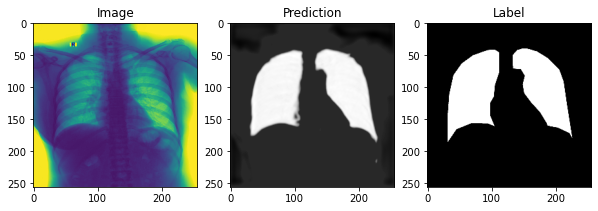

 71%|███████   | 71/100 [11:04<04:32,  9.41s/it]

True v/s Pred:
0	0.007
0	0.006
0	0.0
0	0.001
0	0.005
0	0.0
0	0.011
0	0.009
1	0.99
0	0.0
0	0.002
0	0.0
0	0.005
0	0.0
0	0.008
[TRAIN] Epoch : 70, Loss : -0.88111


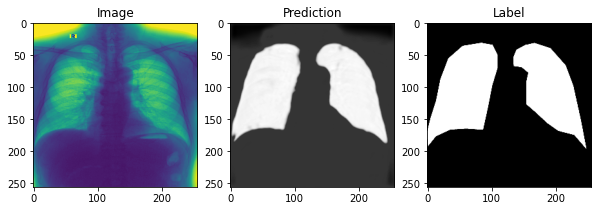

 72%|███████▏  | 72/100 [11:13<04:24,  9.45s/it]

True v/s Pred:
0	0.006
0	0.002
0	0.0
0	0.001
0	0.022
0	0.0
0	0.003
0	0.009
1	0.993
0	0.006
0	0.018
0	0.001
0	0.017
0	0.001
0	0.023
[TRAIN] Epoch : 71, Loss : -0.88676


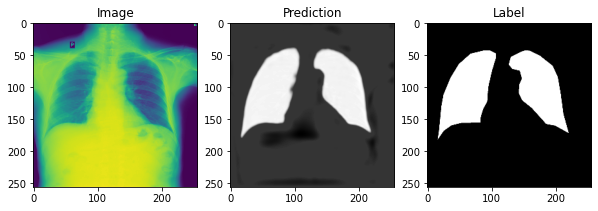

 73%|███████▎  | 73/100 [11:23<04:16,  9.50s/it]

True v/s Pred:
0	0.002
0	0.0
0	0.0
0	0.001
0	0.0
0	0.0
0	0.0
0	0.0
1	0.998
0	0.0
0	0.0
0	0.001
0	0.002
0	0.0
0	0.001
[TRAIN] Epoch : 72, Loss : -0.89214


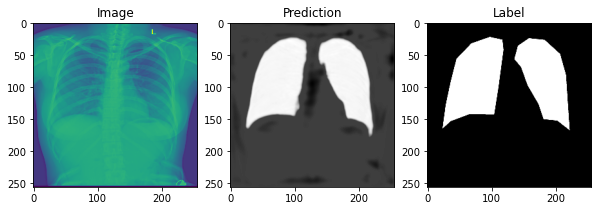

 74%|███████▍  | 74/100 [11:32<04:07,  9.53s/it]

True v/s Pred:
0	0.001
0	0.001
0	0.0
0	0.002
0	0.002
0	0.0
0	0.002
0	0.001
1	0.996
0	0.0
0	0.003
0	0.0
0	0.003
0	0.0
0	0.004
[TRAIN] Epoch : 73, Loss : -0.89764


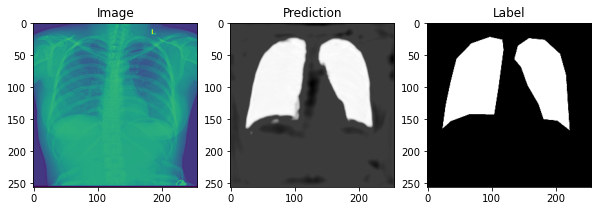

 75%|███████▌  | 75/100 [11:42<03:58,  9.53s/it]

True v/s Pred:
0	0.001
0	0.005
0	0.0
0	0.004
0	0.003
0	0.0
0	0.001
0	0.001
1	0.99
0	0.003
0	0.006
0	0.0
0	0.046
0	0.0
0	0.002
[TRAIN] Epoch : 74, Loss : -0.90317


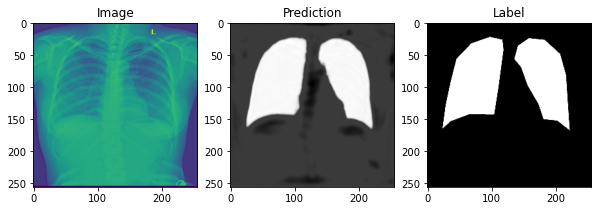

 76%|███████▌  | 76/100 [11:51<03:48,  9.51s/it]

True v/s Pred:
0	0.005
0	0.01
0	0.0
0	0.005
0	0.003
0	0.002
0	0.005
0	0.005
1	0.98
0	0.001
0	0.001
0	0.005
0	0.1
0	0.0
0	0.003
[TRAIN] Epoch : 75, Loss : -0.90856


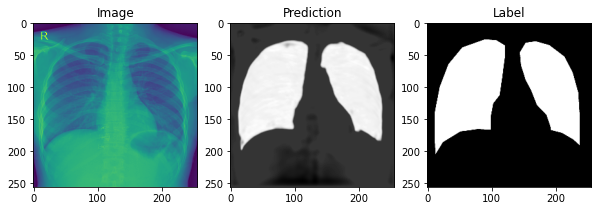

 77%|███████▋  | 77/100 [12:01<03:38,  9.48s/it]

True v/s Pred:
0	0.087
0	0.006
0	0.001
0	0.005
0	0.003
0	0.008
0	0.003
0	0.003
1	0.996
0	0.01
0	0.002
0	0.002
0	0.011
0	0.0
0	0.014
[TRAIN] Epoch : 76, Loss : -0.91436


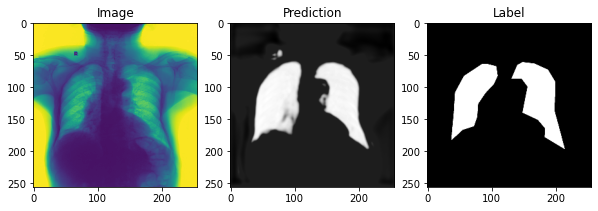

 78%|███████▊  | 78/100 [12:10<03:27,  9.45s/it]

True v/s Pred:
1	0.003
0	0.001
0	0.0
1	0.013
0	0.001
0	0.0
1	0.003
0	0.0
0	0.991
0	0.0
0	0.0
0	0.001
0	0.001
0	0.0
1	0.002
[TRAIN] Epoch : 77, Loss : -0.91643


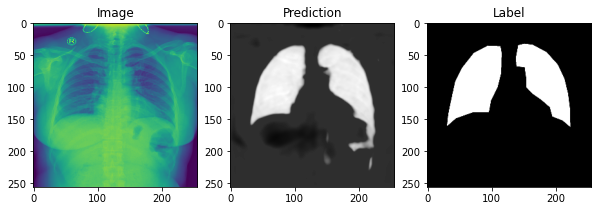

 79%|███████▉  | 79/100 [12:19<03:18,  9.44s/it]

True v/s Pred:
0	0.032
0	0.008
0	0.0
0	0.007
0	0.008
0	0.001
0	0.01
0	0.028
1	0.989
0	0.002
0	0.001
0	0.001
0	0.011
0	0.0
0	0.076
[TRAIN] Epoch : 78, Loss : -0.92018


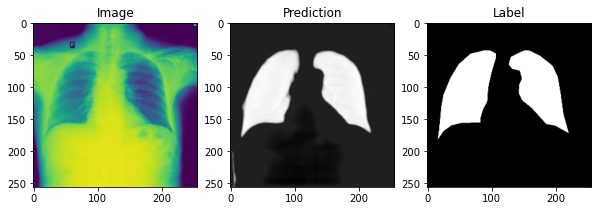

 80%|████████  | 80/100 [12:29<03:08,  9.42s/it]

True v/s Pred:
0	0.018
0	0.002
0	0.0
0	0.022
0	0.001
0	0.0
0	0.004
0	0.001
1	0.956
0	0.0
0	0.001
0	0.0
0	0.011
0	0.0
0	0.004
[TRAIN] Epoch : 79, Loss : -0.92477


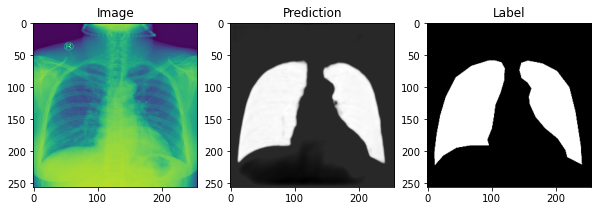

 81%|████████  | 81/100 [12:38<02:58,  9.42s/it]

True v/s Pred:
0	0.008
0	0.003
0	0.0
0	0.019
0	0.007
0	0.001
0	0.009
0	0.001
1	0.949
0	0.021
0	0.006
0	0.003
0	0.003
0	0.0
0	0.008
[TRAIN] Epoch : 80, Loss : -0.93023


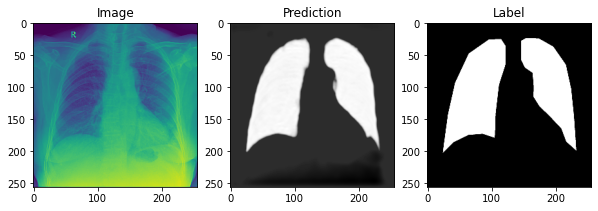

 82%|████████▏ | 82/100 [12:48<02:48,  9.39s/it]

True v/s Pred:
0	0.165
0	0.003
0	0.0
0	0.002
0	0.01
0	0.001
0	0.013
0	0.03
1	0.979
0	0.012
0	0.002
0	0.002
0	0.005
0	0.001
0	0.049
[TRAIN] Epoch : 81, Loss : -0.93574


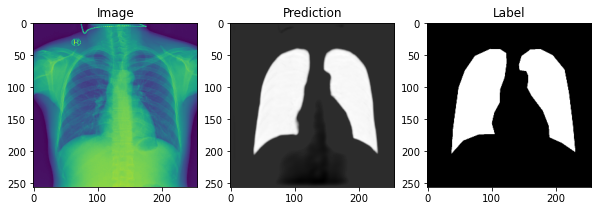

 83%|████████▎ | 83/100 [12:57<02:40,  9.42s/it]

True v/s Pred:
0	0.003
0	0.002
0	0.0
0	0.002
0	0.002
0	0.0
0	0.003
0	0.0
1	0.988
0	0.002
0	0.005
0	0.001
0	0.006
0	0.0
0	0.002
[TRAIN] Epoch : 82, Loss : -0.94120


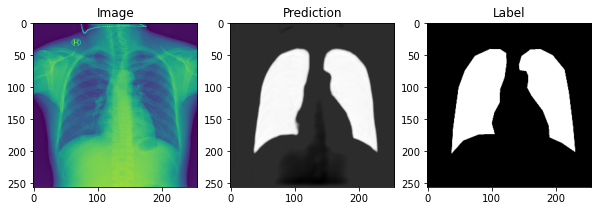

 84%|████████▍ | 84/100 [13:07<02:32,  9.51s/it]

True v/s Pred:
0	0.004
0	0.001
0	0.0
0	0.001
0	0.004
0	0.0
0	0.002
0	0.002
1	0.992
0	0.001
0	0.001
0	0.0
0	0.004
0	0.0
0	0.012
[TRAIN] Epoch : 83, Loss : -0.94670


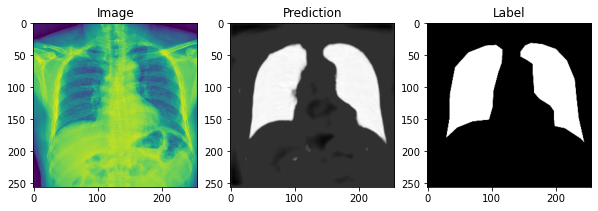

 85%|████████▌ | 85/100 [13:16<02:22,  9.48s/it]

True v/s Pred:
0	0.003
0	0.003
0	0.0
0	0.005
0	0.017
0	0.0
0	0.005
0	0.014
1	0.993
0	0.0
0	0.001
0	0.001
0	0.003
0	0.0
0	0.007
[TRAIN] Epoch : 84, Loss : -0.95207


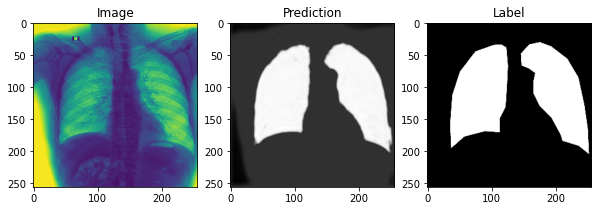

 86%|████████▌ | 86/100 [13:26<02:12,  9.47s/it]

True v/s Pred:
0	0.007
0	0.01
0	0.0
0	0.046
0	0.015
0	0.001
0	0.012
0	0.012
1	0.975
0	0.028
0	0.017
0	0.001
0	0.033
0	0.0
0	0.027
[TRAIN] Epoch : 85, Loss : -0.95777


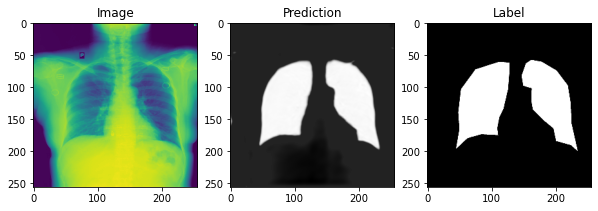

 87%|████████▋ | 87/100 [13:35<02:02,  9.41s/it]

True v/s Pred:
0	0.004
0	0.001
0	0.0
0	0.097
0	0.004
0	0.0
0	0.023
0	0.002
1	0.9
0	0.001
0	0.008
0	0.004
0	0.031
0	0.001
0	0.003
[TRAIN] Epoch : 86, Loss : -0.96310


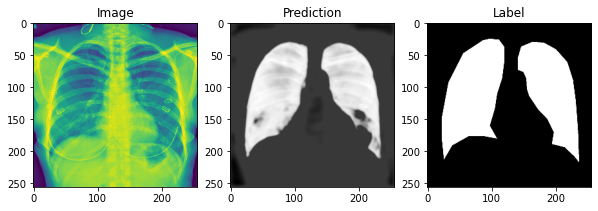

 88%|████████▊ | 88/100 [13:44<01:53,  9.45s/it]

True v/s Pred:
0	0.008
0	0.001
0	0.0
0	0.001
0	0.0
0	0.0
0	0.001
0	0.0
1	0.998
0	0.0
0	0.0
0	0.0
0	0.001
0	0.0
0	0.003
[TRAIN] Epoch : 87, Loss : -0.96838


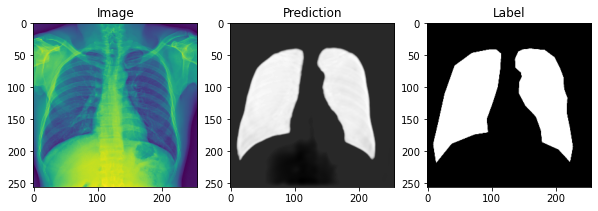

 89%|████████▉ | 89/100 [13:54<01:44,  9.49s/it]

True v/s Pred:
0	0.001
0	0.002
0	0.0
0	0.071
0	0.005
0	0.0
0	0.007
0	0.002
1	0.977
0	0.0
0	0.003
0	0.001
0	0.005
0	0.0
0	0.026
[TRAIN] Epoch : 88, Loss : -0.97374


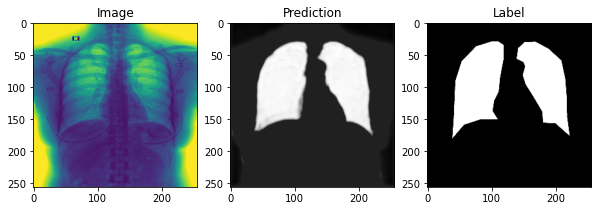

 90%|█████████ | 90/100 [14:04<01:34,  9.50s/it]

True v/s Pred:
0	0.006
0	0.003
0	0.001
0	0.039
0	0.025
0	0.01
0	0.011
0	0.025
1	0.963
0	0.004
0	0.005
0	0.007
0	0.008
0	0.0
0	0.014
[TRAIN] Epoch : 89, Loss : -0.97898


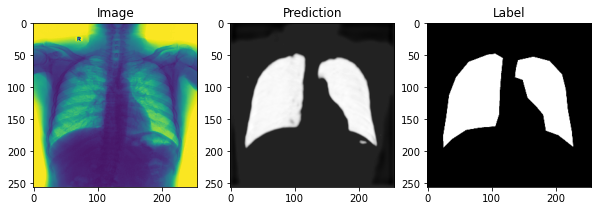

 91%|█████████ | 91/100 [14:13<01:25,  9.51s/it]

True v/s Pred:
0	0.001
0	0.002
0	0.0
0	0.03
0	0.002
0	0.0
1	0.004
1	0.0
0	0.972
0	0.0
0	0.002
0	0.0
0	0.007
0	0.0
1	0.006
[TRAIN] Epoch : 90, Loss : -0.98233


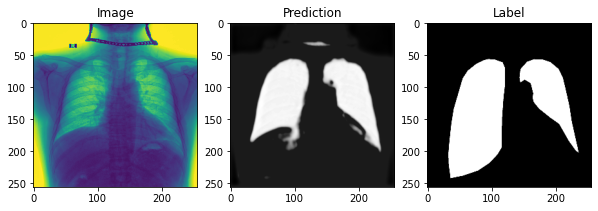

 92%|█████████▏| 92/100 [14:22<01:15,  9.47s/it]

True v/s Pred:
0	0.007
0	0.014
0	0.0
0	0.006
0	0.002
0	0.0
0	0.06
0	0.003
1	0.987
0	0.001
0	0.0
0	0.001
0	0.006
0	0.0
0	0.013
[TRAIN] Epoch : 91, Loss : -0.98730


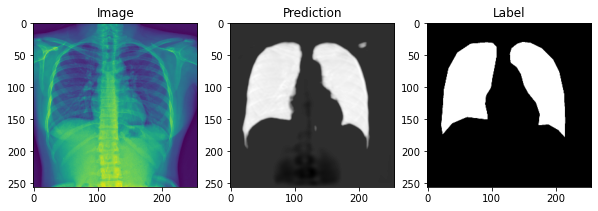

 93%|█████████▎| 93/100 [14:32<01:06,  9.48s/it]

True v/s Pred:
0	0.001
0	0.001
0	0.0
0	0.002
0	0.003
0	0.0
0	0.004
0	0.001
1	0.996
0	0.001
0	0.001
0	0.0
0	0.002
0	0.0
0	0.002
[TRAIN] Epoch : 92, Loss : -0.99194


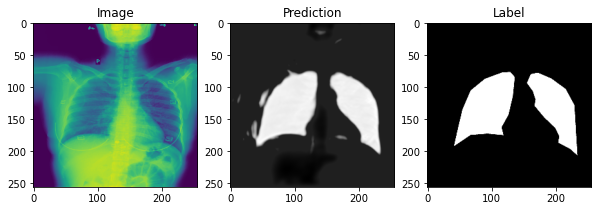

 94%|█████████▍| 94/100 [14:41<00:56,  9.45s/it]

True v/s Pred:
0	0.005
0	0.01
0	0.0
0	0.008
0	0.001
0	0.0
0	0.024
0	0.002
1	0.975
0	0.001
0	0.022
0	0.0
0	0.012
0	0.0
0	0.005
[TRAIN] Epoch : 93, Loss : -0.99691


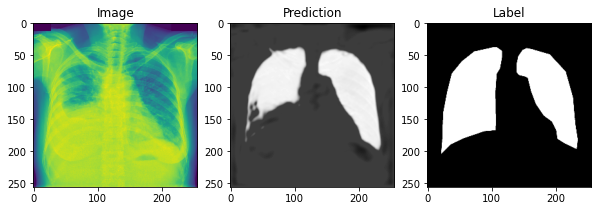

 95%|█████████▌| 95/100 [14:51<00:47,  9.40s/it]

True v/s Pred:
0	0.004
0	0.001
0	0.0
0	0.004
1	0.005
0	0.0
1	0.018
1	0.012
0	0.982
0	0.001
0	0.001
1	0.0
1	0.006
0	0.0
0	0.011
[TRAIN] Epoch : 94, Loss : -0.99956


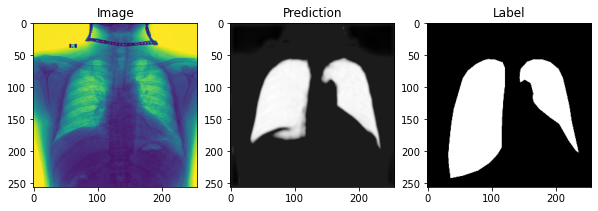

 96%|█████████▌| 96/100 [15:00<00:37,  9.46s/it]

True v/s Pred:
0	0.014
0	0.002
0	0.0
0	0.005
0	0.012
0	0.0
0	0.007
0	0.016
1	0.981
0	0.0
0	0.0
0	0.01
0	0.021
0	0.001
0	0.004
[TRAIN] Epoch : 95, Loss : -1.00403


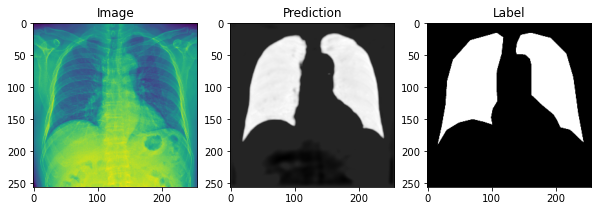

 97%|█████████▋| 97/100 [15:10<00:28,  9.42s/it]

True v/s Pred:
0	0.01
0	0.001
0	0.0
0	0.003
0	0.005
0	0.001
0	0.008
0	0.004
1	0.993
0	0.001
0	0.0
0	0.004
0	0.004
0	0.0
0	0.009
[TRAIN] Epoch : 96, Loss : -1.00937


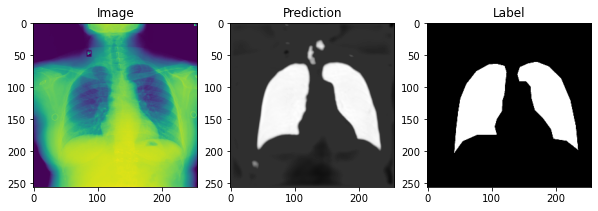

 98%|█████████▊| 98/100 [15:19<00:18,  9.47s/it]

True v/s Pred:
0	0.002
0	0.006
0	0.0
0	0.026
0	0.032
0	0.0
0	0.007
0	0.025
1	0.976
0	0.005
0	0.005
0	0.001
0	0.032
0	0.0
0	0.028
[TRAIN] Epoch : 97, Loss : -1.01456


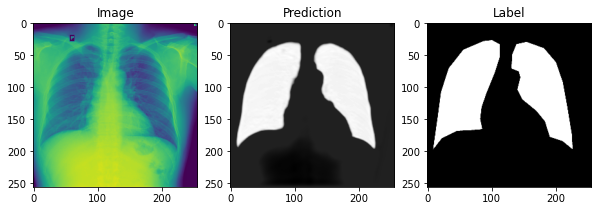

 99%|█████████▉| 99/100 [15:29<00:09,  9.48s/it]

True v/s Pred:
0	0.002
0	0.001
0	0.0
0	0.002
0	0.004
0	0.0
0	0.007
0	0.002
1	0.99
0	0.001
0	0.001
0	0.001
0	0.002
0	0.0
0	0.005
[TRAIN] Epoch : 98, Loss : -1.01999


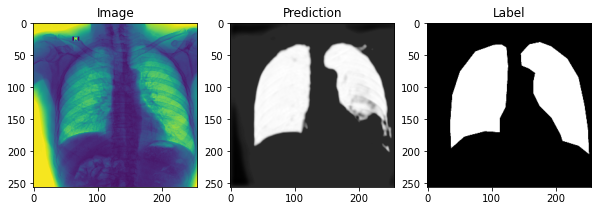

100%|██████████| 100/100 [15:38<00:00,  9.39s/it]

True v/s Pred:
0	0.018
0	0.002
0	0.0
0	0.003
0	0.034
0	0.0
0	0.012
0	0.033
1	0.963
0	0.002
0	0.001
0	0.001
0	0.014
0	0.0
0	0.02
[TRAIN] Epoch : 99, Loss : -1.02546


In [37]:
# train model
loss_list = []
for epoch in tqdm(range(num_epochs)):
    model.train()

    for data in dataAll["Train"]:
        X = data['cxr'].to(device).type(torch.float)

        Y_class = data['Y'].to(device)
        Y_seg = data['gaze'].to(device).type(torch.float)

        optimizer.zero_grad()
        Y_class_pred, Y_seg_pred = model(X)
        
        loss = classification_loss(Y_class_pred.type(torch.float), Y_class.type(torch.float)) + seg_pred_loss(Y_seg_pred.type(torch.float), Y_seg.type(torch.float))
        loss.backward()

        optimizer.step()
        loss_list.append(loss.detach().clone().cpu())
                
    visualize(data, Y_seg_pred, Y_class_pred)
    
    print("[TRAIN] Epoch : %d, Loss : %2.5f" % (epoch, np.mean(loss_list)))
#     if (epoch + 1) % val_check == 0:
    

#         cur_loss = validation(model, val_dataloader)
#         print("[VALIDATION] Epoch : %d, Loss : %2.5f" % (epoch, cur_loss))
#         if cur_loss < best_loss:
#             best_loss = cur_loss
#             torch.save(model.state_dict(), os.path.join("seg", model_path)) 